Need to read dcm files: 
* https://pyscience.wordpress.com/2014/09/08/dicom-in-python-importing-medical-image-data-into-numpy-with-pydicom-and-vtk/
* https://medium.com/coinmonks/visualizing-brain-imaging-data-fmri-with-python-e1d0358d9dba
* https://www.raddq.com/dicom-processing-segmentation-visualization-in-python/

**.nii.tz format**
* https://nilearn.github.io/introduction.html#what-is-nilearn-mvpa-decoding-predictive-models-functional-connectivity
* http://nipy.org/nibabel/nibabel_images.html

### fMRI preprocessing
* https://www.coursera.org/learn/functional-mri/home/week/3


* SURFACE EXTRACTION: https://pyscience.wordpress.com/2014/09/11/surface-extraction-creating-a-mesh-from-pixel-data-using-python-and-vtk/
http://nbviewer.jupyter.org/urls/bitbucket.org/somada141/pyscience/raw/master/20140908_SurfaceExtraction/Material/SurfaceExtractionVTK.ipynb

* IMAGE SEGMENTATION: https://pyscience.wordpress.com/2014/10/19/image-segmentation-with-python-and-simpleitk/
http://nbviewer.jupyter.org/urls/bitbucket.org/somada141/pyscience/raw/master/20141001_SegmentationSimpleITK/Material/SegmentationSimpleITK.ipynb

* VOLUME RENDERING: https://pyscience.wordpress.com/2014/11/16/volume-rendering-with-python-and-vtk/
http://nbviewer.jupyter.org/urls/bitbucket.org/somada141/pyscience/raw/master/20141029_VolumeRendering/Material/VolumeRendering.ipynb

(https://pyscience.wordpress.com/archives/)

* http://mriquestions.com/data-pre-processing.html

Similar Kaggle competitions:
* https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/kernels
* https://www.kaggle.com/c/data-science-bowl-2017/discussion/28034
* https://www.kaggle.com/ashishpatel26/chexnet-radiologist-level-pneumonia-detection
* https://github.com/booz-allen-hamilton/DSB3Tutorial

**THE BEST**: https://github.com/taigw/brats17

to download the pre-trained model: https://cmiclab.cs.ucl.ac.uk/CMIC/NiftyNetExampleServer/blob/master/anisotropic_nets_brats_challenge_model_zoo.md

In [1]:
import numpy as np
import pandas as pd
import ntpath
import os
import matplotlib.pyplot as plt
% matplotlib inline
import pydicom

In [2]:
def reading_csv_files(folder_path):
    # saving all the csv files in a dataframe
    import os
    import glob
    # glob.glob('*.csv') #find all the csv files in a pathname. 
    os.chdir(folder_path)
    csv_files = [i for i in glob.glob('*.csv')]

    # Reading each csv file and storing them in a dictionnary containing the file name and the dataframe
    dict_files={}
    files_names=[]
    for files in csv_files:
    #for i, files in enumerate(csv_files): 
        df=pd.read_csv(files,engine='python')
        basepath, filename=ntpath.split(files)
        files_names.append(filename)
        dict_files[filename]=df

    # Calculating the # of rows and features for each dataframe and storing them in a list of tuples
    shape_df=[]
    for i in range(0,len(dict_files.keys())):
        nrows, ncols=(len(dict_files[files_names[i]]),len(dict_files[files_names[i]].columns))
        shape_df.append((nrows,ncols))
        
    return (shape_df,files_names,dict_files)

In [3]:
folder_path='/Users/alicemartin/02_DSR_Project/parkinson-disease-project/data/PPMI-final-dataset-382018/4-Imaging/'
files_names=reading_csv_files(folder_path)[1]
dict_files=reading_csv_files(folder_path)[2]
MRIINFO=dict_files[files_names[10]]
print(len(MRIINFO))
print(len(np.unique(MRIINFO['study_subject_id'])))
#MRIINFO.head(100)

1342
811


In [4]:
#!cd '/Users/alicemartin/02_DSR_Project/01_Data/00-PPMI-final-dataset-382018/fMRI_data/PPMI
#!ls > listOfFolders.txt

`path_listOffolders='/Users/alicemartin/02_DSR_Project/01_Data/00-PPMI-final-dataset-382018/fMRI_data/PPMI/listOfFolders.txt'


appendText="'"
folders=open(path_listOffolders,'r')
updatedFolders=open('/Users/alicemartin/02_DSR_Project/01_Data/00-PPMI-final-dataset-382018/fMRI_data/PPMI/updatedfolders.txt','a')
for name in folders:
    updatedFolders.write(appendText + name.rstrip() + appendText + '\n')
updatedFolders.close()

path_updatedFolders='/Users/alicemartin/02_DSR_Project/01_Data/00-PPMI-final-dataset-382018/fMRI_data/PPMI/updatedfolders.txt'
with open(path_updatedFolders, 'r') as f:
    file_lines = [''.join([x.strip(), ',', '\n']) for x in f.readlines()]

with open(path_updatedFolders, 'w') as f:
    f.writelines(file_lines)`

missing_index=df_metadata_csv[df_metadata_csv['Subject'].isin(foldersPPMI)==False].index
missing_subject=df_metadata_csv.loc[df_metadata_csv['Subject'].isin(foldersPPMI)==False,'Subject']
list_missing_subject=list(missing_subject.values)

### Test on Patient # 3351 folder

In [5]:
path_test='/Users/alicemartin/02_DSR_Project/01_Data/00-PPMI-final-dataset-382018/fMRI_data/PPMI/3351/ep2d_RESTING_STATE/2015-06-01_08_19_43.0/S271109'

210
(462, 476, 210) (3.2941176891327, 3.2941176891327, 3.2999999523163)
(462, 476)
((462, 476), (462, 476))


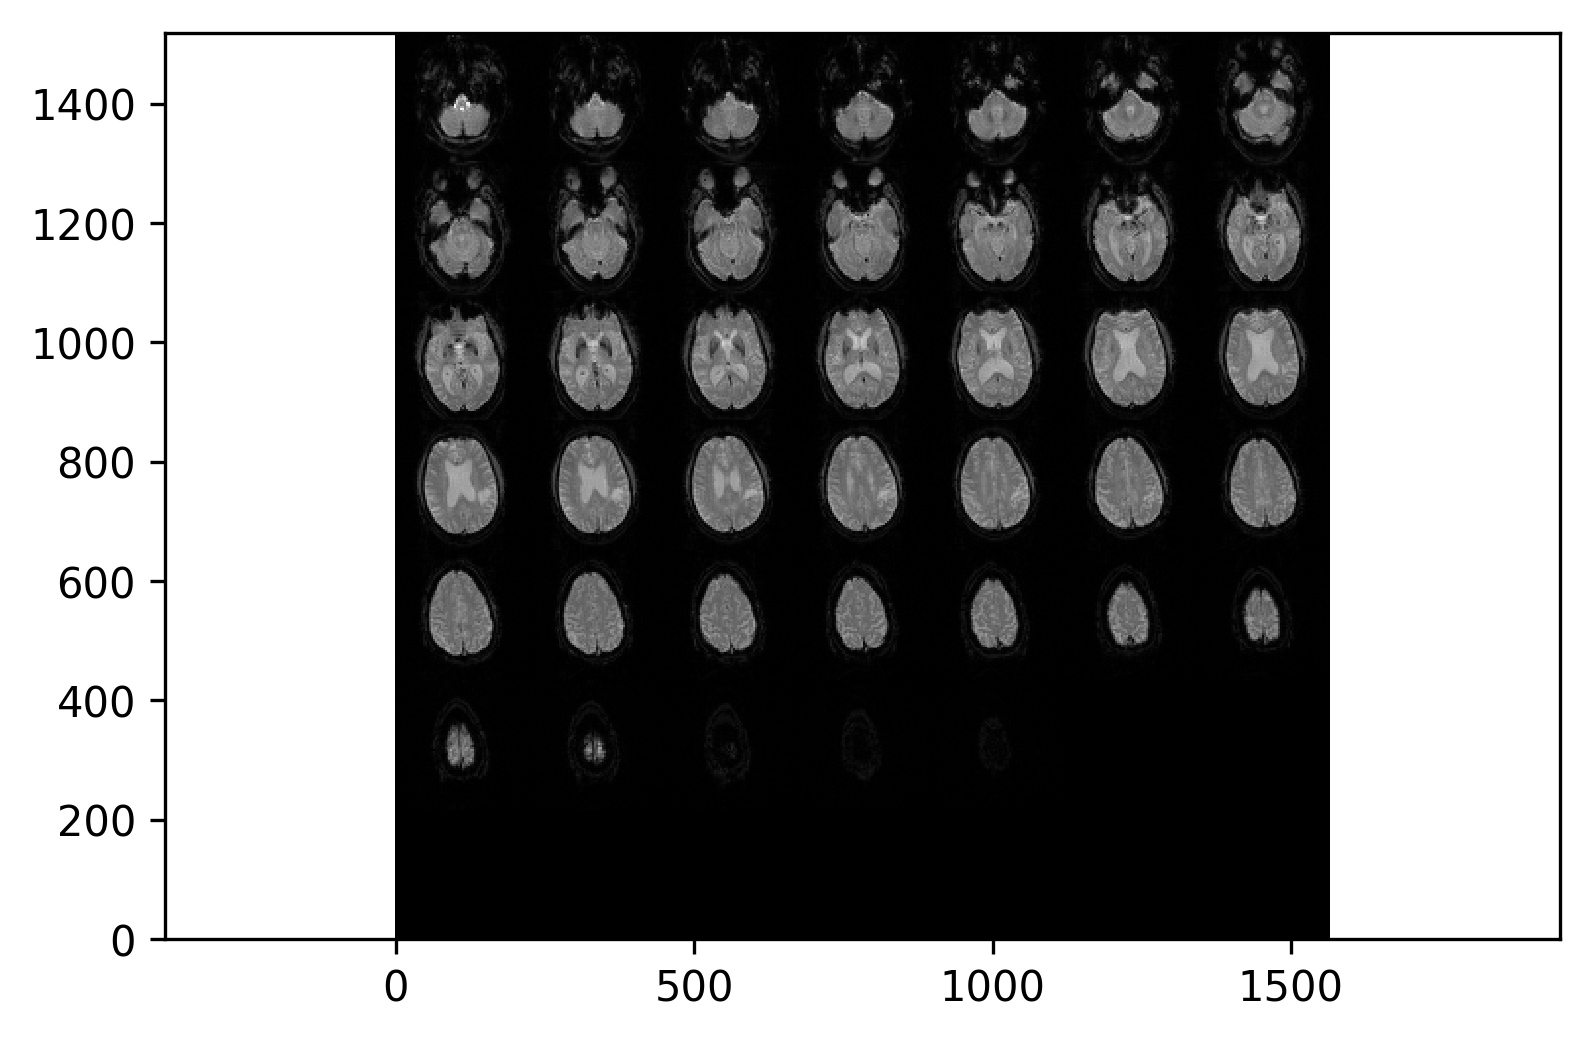

In [6]:
PathDicom =path_test
lstFilesDCM = []  # create an empty list
for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in fileList:
        if ".dcm" in filename.lower():  # check whether the file's DICOM
            lstFilesDCM.append(os.path.join(dirName,filename))
print(len(lstFilesDCM))

# Get ref file
RefDs = pydicom.read_file(lstFilesDCM[0])

# Load dimensions based on the number of rows, columns, and slices (along the Z axis)
ConstPixelDims = (int(RefDs.Rows), int(RefDs.Columns), len(lstFilesDCM))

# Load spacing values (in mm)
ConstPixelSpacing = (float(RefDs.PixelSpacing[0]), float(RefDs.PixelSpacing[1]), float(RefDs.SliceThickness))

print(ConstPixelDims, ConstPixelSpacing)

x = np.arange(0.0, (ConstPixelDims[0])*ConstPixelSpacing[0], ConstPixelSpacing[0])
y = np.arange(0.0, (ConstPixelDims[1])*ConstPixelSpacing[1], ConstPixelSpacing[1])
z = np.arange(0.0, (ConstPixelDims[2])*ConstPixelSpacing[2], ConstPixelSpacing[2])

# The array is sized based on 'ConstPixelDims'
ArrayDicom = np.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)
# loop through all the DICOM files
for filenameDCM in lstFilesDCM:
    # read the file
    ds = pydicom.read_file(filenameDCM)
    # store the raw image data
    ArrayDicom[:, :, lstFilesDCM.index(filenameDCM)] = ds.pixel_array

plt.figure(dpi=300)
plt.axes().set_aspect('equal', 'datalim')
plt.set_cmap(plt.gray())
X, Y = np.meshgrid(y, x)
array=np.flipud(ArrayDicom[:, :, 80])
print(array.shape),print((X.shape,Y.shape))
plt.pcolormesh(X,Y,array)

In [7]:
#help(os.walk)

## 1. Data-Preprocessing

### Creating the labels

In [8]:
file_path='/Users/alicemartin/02_DSR_Project/parkinson-disease-project/output/pre-processing/dfFinal.csv'
df=pd.read_csv(file_path)
df.drop(columns='Unnamed: 0',inplace=True)
df.NHY=df['NHY'].apply(lambda x: round(x,0))
#df.head()
dfSel=df[['PATNO','EVENT_ID','INFODT_date','VISIT_ID','num_visits','NHY']]
dfSel.head()

PATNO EVENT_ID INFODT_date  VISIT_ID  num_visits  NHY
0   3001       SC  2011-02-01         1           7  2.0
1   3001      V04  2012-03-01         2           7  2.0
2   3001      V06  2013-05-01         3           7  2.0
3   3001      V08  2014-04-01         4           7  2.0
4   3001      V10  2015-04-01         5           7  2.0

In [9]:
path_metadata_csv='/Users/alicemartin/02_DSR_Project/01_Data/00-PPMI-final-dataset-382018/fMRI_data/pop_all_-_FMRI_9_03_2018.csv'

In [10]:
df_metadata=pd.read_csv(path_metadata_csv)
print(len(df_metadata))
pat_fMRI=list(np.unique(df_metadata['Subject']))
#df_metadata.rename(columns={'Subject':'PATNO'},inplace=True)
df_metadata['PATNO']=df_metadata.Subject
df_metadata.sort_values('PATNO',inplace=True)
df_metadata.drop(columns=['Format','Downloaded','Modality','Type'],inplace=True)
print(set(df_metadata.Visit))
PPMIpatients=list(set(df_metadata[df_metadata.Group!='Phantom']))

PhantomList=df_metadata.loc[df_metadata['Group']=='Phantom','PATNO']
print(len(PhantomList))
PhantomList2=PhantomList.apply(lambda x: x[:3])
print(len(np.unique(PhantomList2.values)))
df_metadata.loc[df_metadata['Group']=='Phantom','PATNO']=PhantomList2

# convert Acq Date to datatime
from datetime import datetime
df_metadata['AcqDT_date']=df_metadata['Acq Date'].apply(lambda x: datetime.strptime(x,'%m/%d/%Y'))

df_metadata.head()

487
{0, 1, 5, 7, 9, 11, 21, 90}
258
9


Image Data ID     Subject    Group Sex  Age  Visit         Description  \
486         423662  00705MAR14  Phantom   M   59      0  ep2d_RESTING_STATE   
485         373407  00706FEB13  Phantom   X   50      0  ep2d_RESTING_STATE   
484         525626  00706MAY15  Phantom   X   50      0  ep2d_RESTING_STATE   
483         434904  00707MAY14  Phantom   M   59      0  ep2d_RESTING_STATE   
482         525645  00708MAY15  Phantom   X   50      0  ep2d_RESTING_STATE   

      Acq Date PATNO AcqDT_date  
486  3/05/2014   007 2014-03-05  
485  2/06/2013   007 2013-02-06  
484  5/06/2015   007 2015-05-06  
483  5/07/2014   007 2014-05-07  
482  5/08/2015   007 2015-05-08

In [51]:
subdf_fMRI=dfSel[dfSel.PATNO.isin(PPMIpatients)]
subdf_fMRI.head()

Empty DataFrame
Columns: [PATNO, EVENT_ID, INFODT_date, VISIT_ID, num_visits, NHY]
Index: []

In [12]:
df_metadata.groupby('Subject').size().sort_values(ascending=False)
df_metadata.groupby('Subject').size().sort_values(ascending=False).value_counts()

1    341
2     61
3      8
dtype: int64

In [13]:
def map_feat_to_feat(df,feat1,feat2,dates_name):
    dict_patients_INFODT={}
    for patient in list(set(df[feat1])):
        dates=df.loc[df[feat1]==patient, feat2]
        INFODT_list=[date for date in dates.values]
        dict_patients_INFODT[patient]=INFODT_list
    #dict_patients_INFODT
    map_patient_INFODT=pd.Series(dict_patients_INFODT).to_frame()
    #map_patient_INFODT[feat1]=map_patient_INFODT.index
    map_patient_INFODT.rename(columns={0:dates_name},inplace=True)
    return map_patient_INFODT


map_patient_INFODT=map_feat_to_feat(dfSel,'PATNO','INFODT_date','visit_dates')
#map_patient_INFODT.head()

map_patient_acqDT=map_feat_to_feat(df_metadata[df_metadata['Group']!='Phantom'],'PATNO','AcqDT_date','acquisitions_dates')
print(len(map_patient_acqDT))
#map_patient_acqDT.head()

visit_dates
3001  [2011-02-01, 2012-03-01, 2013-05-01, 2014-04-0...
3002  [2011-03-01, 2012-04-01, 2013-04-01, 2015-03-0...
3003  [2011-03-01, 2012-04-01, 2013-04-01, 2014-04-0...
3006                           [2011-03-01, 2012-05-01]
3007                                       [2011-04-01]

### Processing of the brain scans

In [67]:
PathDicom ='/Users/alicemartin/02_DSR_Project/01_Data/00-PPMI-final-dataset-382018/fMRI_data/PPMI'
lstFilesDCM = []  # create an empty list
for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in fileList:
        if ".dcm" in filename.lower():  # check whether the file's DICOM
            lstFilesDCM.append(os.path.join(dirName,filename))
print('number of DCM files:{}'.format(len(lstFilesDCM)))
patients_fMRI=os.listdir(PathDicom)
print('number of brain scans:{}'.format(len(patients_fMRI)))

#lstFilesDCM
with open('List_DCM_files.txt', 'w') as f:
    for item in lstFilesDCM:
        f.write("%s\n" % item)

dict_pat_dcmfile={}
list_pat_dcmfile=[]
for dcm in lstFilesDCM:
    p=os.path.relpath(dcm,PathDicom)
    pat=str.split(p,'/')[0]
    scan_date=str.split(p,'/')[2]
    list_pat_dcmfile.append((pat,scan_date,dcm))
list_pat_dcmfile[0]

number of DCM files:84262
number of brain scans:409


('3365',
 '2013-10-09_08_33_27.0',
 '/Users/alicemartin/02_DSR_Project/01_Data/00-PPMI-final-dataset-382018/fMRI_data/PPMI/3365/ep2d_RESTING_STATE/2013-10-09_08_33_27.0/S205645/PPMI_3365_MR_ep2d_RESTING_STATE_br_raw_20131107160424133_73_S205645_I397597.dcm')

In [71]:
Patient_DCM_Mapping=pd.Series(list_pat_dcmfile).to_frame()
Patient_DCM_Mapping.rename(columns={0:'tuple'},inplace=True)
Patient_DCM_Mapping['Subject']=Patient_DCM_Mapping['tuple'].apply(lambda x: x[0])
Patient_DCM_Mapping['scan_date']=Patient_DCM_Mapping['tuple'].apply(lambda x: x[1])
Patient_DCM_Mapping['dcm_file']=Patient_DCM_Mapping['tuple'].apply(lambda x: x[2])
assert len(Patient_DCM_Mapping)==len(lstFilesDCM)
print('number of patients:{}'.format(len(set(Patient_DCM_Mapping['Subject']))))
Patient_DCM_Mapping['scan_date']=Patient_DCM_Mapping['scan_date'].apply(lambda x: str.split(x,'_')[0])
Patient_DCM_Mapping['AcqDT_date']=Patient_DCM_Mapping['scan_date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))
Patient_DCM_Mapping.head(2)

number of patients:384


tuple Subject   scan_date  \
0  (3365, 2013-10-09_08_33_27.0, /Users/alicemart...    3365  2013-10-09   
1  (3365, 2013-10-09_08_33_27.0, /Users/alicemart...    3365  2013-10-09   

                                            dcm_file AcqDT_date  
0  /Users/alicemartin/02_DSR_Project/01_Data/00-P... 2013-10-09  
1  /Users/alicemartin/02_DSR_Project/01_Data/00-P... 2013-10-09

In [72]:
df_metadata.head(2)

Image Data ID     Subject    Group Sex  Age  Visit         Description  \
486         423662  00705MAR14  Phantom   M   59      0  ep2d_RESTING_STATE   
485         373407  00706FEB13  Phantom   X   50      0  ep2d_RESTING_STATE   

      Acq Date PATNO AcqDT_date  
486  3/05/2014   007 2014-03-05  
485  2/06/2013   007 2013-02-06

In [73]:
pat_meta=list(np.unique(df_metadata['Subject']))
pat_files=list(set(Patient_DCM_Mapping['Subject']))
print(np.sum([x in pat_files for x in pat_meta]))
print(np.sum([x in pat_fMRI for x in pat_meta]))
missing_pat=[x in pat_meta for x in pat_files]

384
410


In [109]:
slices=Patient_DCM_Mapping.groupby(['Subject','scan_date']).size().to_frame().rename(columns={0:'slices'})
slices.reset_index(inplace=True)
Subject_slices210=slices.loc[slices['slices']==210,'Subject']
slices.head()
Subject_slices164
Patient_DCM_Mapping['slices']=210
Patient_DCM_Mapping['slices']=Patient_DCM_Mapping['slices'].where(Patient_DCM_Mapping['Subject'].isin(Subject_slices210),
                                                                 'to_drop')
Patient_DCM_Mapping.head()


tuple Subject   scan_date  \
0  (3365, 2013-10-09_08_33_27.0, /Users/alicemart...    3365  2013-10-09   
1  (3365, 2013-10-09_08_33_27.0, /Users/alicemart...    3365  2013-10-09   
2  (3365, 2013-10-09_08_33_27.0, /Users/alicemart...    3365  2013-10-09   
3  (3365, 2013-10-09_08_33_27.0, /Users/alicemart...    3365  2013-10-09   
4  (3365, 2013-10-09_08_33_27.0, /Users/alicemart...    3365  2013-10-09   

                                            dcm_file AcqDT_date slices  
0  /Users/alicemartin/02_DSR_Project/01_Data/00-P... 2013-10-09    210  
1  /Users/alicemartin/02_DSR_Project/01_Data/00-P... 2013-10-09    210  
2  /Users/alicemartin/02_DSR_Project/01_Data/00-P... 2013-10-09    210  
3  /Users/alicemartin/02_DSR_Project/01_Data/00-P... 2013-10-09    210  
4  /Users/alicemartin/02_DSR_Project/01_Data/00-P... 2013-10-09    210

In [122]:
df_fMRI=pd.merge(df_metadata,Patient_DCM_Mapping,on='Subject',how='outer')
mask=df_fMRI['tuple'].isnull()
missing=df_fMRI.loc[mask,'Subject']
df_fMRI2=df_fMRI.dropna()
df_fMRI2.drop(columns=['tuple','scan_date','AcqDT_date_y'],inplace=True)
df_fMRI2=df_fMRI2[df_fMRI2['slices']==210]
df_fMRI2['pat_date_ID']=df_fMRI['PATNO']+'-'+df_fMRI['Acq Date']
df_fMRI2.head()

/Users/alicemartin/miniconda3/envs/project/lib/python3.5/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Image Data ID     Subject    Group Sex  Age  Visit         Description  \
24         373436  00722APR13  Phantom   X   50      0  ep2d_RESTING_STATE   
25         373436  00722APR13  Phantom   X   50      0  ep2d_RESTING_STATE   
26         373436  00722APR13  Phantom   X   50      0  ep2d_RESTING_STATE   
27         373436  00722APR13  Phantom   X   50      0  ep2d_RESTING_STATE   
28         373436  00722APR13  Phantom   X   50      0  ep2d_RESTING_STATE   

     Acq Date PATNO AcqDT_date_x  \
24  4/22/2013   007   2013-04-22   
25  4/22/2013   007   2013-04-22   
26  4/22/2013   007   2013-04-22   
27  4/22/2013   007   2013-04-22   
28  4/22/2013   007   2013-04-22   

                                             dcm_file slices    pat_date_ID  
24  /Users/alicemartin/02_DSR_Project/01_Data/00-P...    210  007-4/22/2013  
25  /Users/alicemartin/02_DSR_Project/01_Data/00-P...    210  007-4/22/2013  
26  /Users/alicemartin/02_DSR_Project/01_Data/00-P...    210  007-4/22/2013  
27  /Users/alicemartin/02_DSR_Project/01_Data/00-P...    210  007-4/22/2013  
28  /Users/alicemartin/02_DSR_Project/01_Data/00-P...    210  007-4/22/2013

In [93]:
ddf_fMRI=pd.merge(df_metadata,Patient_DCM_Mapping,on=['Subject','AcqDT_date'],how='outer')
mask=ddf_fMRI['tuple'].isnull()
missing=ddf_fMRI.loc[mask,'Subject']
print(len(missing))
#df_fMRI2=df_fMRI.dropna()
#ddf_fMRI.head()

84


In [118]:
len(df_fMRI2)#/ len(set(df_fMRI2['Subject']))

104442

In [117]:
len(set(df_fMRI2['Image Data ID']))*210

95340

In [133]:
def map_feat_to_feat(df,feat1,feat2,dates_name):
    dict_patients_INFODT={}
    for patient in list(set(df[feat1])):
        dates=df.loc[df[feat1]==patient, feat2]
        INFODT_list=[date for date in dates.values]
        dict_patients_INFODT[patient]=INFODT_list
    #dict_patients_INFODT
    map_patient_INFODT=pd.Series(dict_patients_INFODT).to_frame()
    #map_patient_INFODT[feat1]=map_patient_INFODT.index
    map_patient_INFODT.rename(columns={0:dates_name},inplace=True)
    return map_patient_INFODT

map_pat_fMRI=map_feat_to_feat(df_fMRI2,'pat_date_ID','dcm_file','dcm_list')
print(len(map_pat_fMRI.iloc[0].values))

1


### Getting the 3D-info for each brain scan

In [ ]:
def fMRI_dimensions(serie):
    # Get ref file
    RefDs = pydicom.read_file(lstFilesDCM[0])

    # Load dimensions based on the number of rows, columns, and slices (along the Z axis)
    ConstPixelDims = (int(RefDs.Rows), int(RefDs.Columns), len(lstFilesDCM))

    # Load spacing values (in mm)
    ConstPixelSpacing = (float(RefDs.PixelSpacing[0]), float(RefDs.PixelSpacing[1]), float(RefDs.SliceThickness))

    print(ConstPixelDims, ConstPixelSpacing)

    x = np.arange(0.0, (ConstPixelDims[0])*ConstPixelSpacing[0], ConstPixelSpacing[0])
    y = np.arange(0.0, (ConstPixelDims[1])*ConstPixelSpacing[1], ConstPixelSpacing[1])
    z = np.arange(0.0, (ConstPixelDims[2])*ConstPixelSpacing[2], ConstPixelSpacing[2])

In [18]:
import pydicom
# Load the scans in given folder path
def load_scan(path):
    slices = [pydicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: float(x.ImagePositionPatient[2]))
    try:
        slice_thickness = np.abs(slices[0].ImagePositionPatient[2] - slices[1].ImagePositionPatient[2])
    except:
        slice_thickness = np.abs(slices[0].SliceLocation - slices[1].SliceLocation)
    for s in slices:
        s.SliceThickness = slice_thickness
    return slices